In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

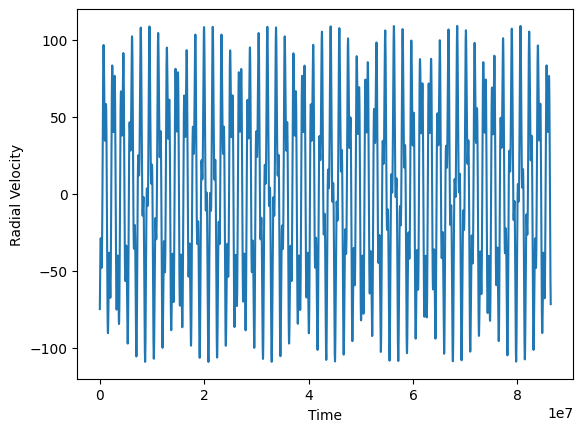

In [38]:
df = pd.read_csv('Prob3_Doppler.csv')

# Plot the radial velocity vs time
plt.plot(df['time_sec'], df['rad_vel'])
plt.xlabel('Time')
plt.ylabel('Radial Velocity')
plt.show()

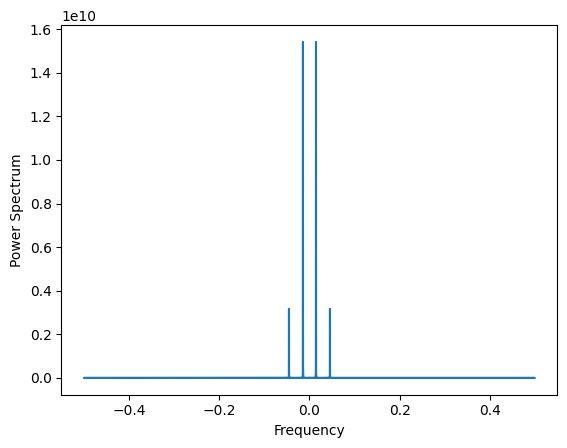

In [39]:
fft = np.fft.fft(df['rad_vel'])

# power spectrum of the Fourier transform
power_spectrum = np.abs(fft)**2
freq =np.fft.fftfreq(len(df['time_sec']))

# Plot the power spectrum
plt.plot(freq, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.show()

In [40]:
# dominant freq
sorted_power = np.argsort(power_spectrum)[::-1]
dominant_frequencies = np.fft.fftfreq(len(df['time_sec']))[sorted_power[:3]]
dominant_frequencies



array([ 0.01446759, -0.01446759,  0.04542824])

In [41]:
period1 = 1 / dominant_frequencies[0]
period2 = 1/ dominant_frequencies[-1]
print('Period:', period1)
print('Period:', period2)

Period: 69.12
Period: 22.012738853503183


In [42]:
mass_star = 1.9885e30  # kg
radius_star = 695700e3  # m
G = 6.6743e-11  # m^3 / (kg s^2)  # seconds
m_planet1 = 4 * np.pi**2 * radius_star**3 / (G * mass_star * period1**2)  # kg
print("Mass of planet:", m_planet1, "kg")

Mass of planet: 20964.61874399866 kg


In [43]:
m_planet2 = 4 * np.pi**2 * radius_star**3 / (G * mass_star * period2**2)  # kg
print("Mass of planet:", m_planet2, "kg")

Mass of planet: 206702.75496832925 kg
